In [49]:
# Import libraries 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, SnowballStemmer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from collections import Counter

import nltk
import pandas as pd
import json, random, re

In [50]:
# Download libraries 
nltk.download('stopwords') #Stopwords
nltk.download('punkt')  #Tokeniser

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [51]:
# Initalise objects
ps = PorterStemmer()
sb = SnowballStemmer(language = "english")
stopwords = stopwords.words('english')

In [52]:
# Check list of stopwords 
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [53]:
#data importing and formating
def process_data(data):
    with open(data,'r') as f:
        raw_data = f.read()
    data = raw_data.split('}\n')
    return [x+'}' for x in data if x != '']

In [54]:
# Load data
rawdata = './reviewSelected100.json'
data = process_data(rawdata)
data_json = [json.loads(x) for x in data]

# Store business id in a list
business_id_list = list({x['business_id'] for x in data_json})  

In [55]:
def count_frequency(business, stop_list = [], stemmer=None):
    
    # collating all reviews into one string
    reviews = ''.join([x['text'] for x in business])
    
    assert type(reviews) == str, "Input variables should be strings"
    s = reviews
    # change all to lowercase
    s = re.sub('[^a-z]+',' ', reviews.lower())
    # clean whitespace and newline
    s = re.sub('[\n\r\s]+', ' ', s)
    vocab = Counter()
    token_words = nltk.word_tokenize(s)
    for word in token_words:
        if word in stop_list:
            continue
        if stemmer != None: 
            word = stemmer.stem(word)
        vocab.update([word])
    return vocab       

In [56]:
def plot_word_freq_dist(vocab):
    fdist_filtered = FreqDist(vocab)
    fdist_filtered.plot(10,title='Frequency distribution for top 10 frequent words')

In [68]:
# Selecting a random business
business_id1 = random.choice(business_id_list)
# Extract corresponding review 
business1 = [x for x in data_json if x['business_id'] == business_id1]
#print(business1)

Most 10 frequent words before stemming:
('tint', 112)
('great', 71)
('service', 65)
('car', 59)
('recommend', 45)
('express', 37)
('place', 36)
('auto', 35)
('work', 33)
('done', 32)


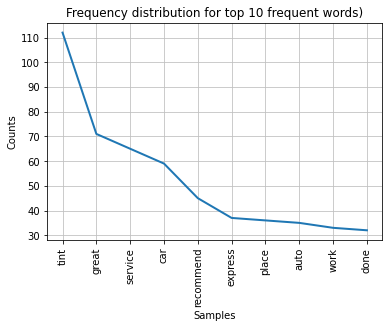

Most 10 frequent words after stemming:
('tint', 155)
('great', 71)
('servic', 70)
('car', 68)
('recommend', 53)
('wait', 44)
('price', 40)
('window', 39)
('express', 38)
('place', 37)


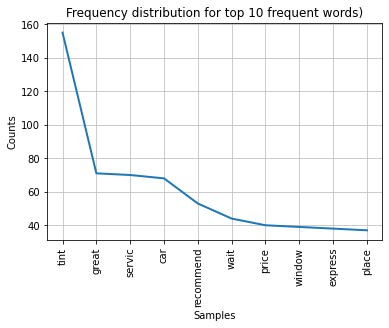

In [69]:
before_stem = count_frequency(business1,stop_list=stopwords)
after_stem = count_frequency(business1,stop_list=stopwords,stemmer = ps)

print("Most 10 frequent words before stemming:")
for x in before_stem.most_common(10):
    print(x)
plot_word_freq_dist(before_stem)

print("Most 10 frequent words after stemming:")
for x in after_stem.most_common(10):
    print(x)
plot_word_freq_dist(after_stem)

In [70]:
# Select another business 
business_id2 = random.choice(business_id_list)

# If the second chosen business is the same as the first business, re-select
while business_id2 == business_id1:
    business_id2 = random.choice(business_id_list)
# Extract corresponding review 
business2 = [x for x in data_json if x['business_id'] == business_id2]
#print(business2)

Most 10 frequent words before stemming:
('beer', 87)
('great', 71)
('place', 66)
('games', 51)
('selection', 49)
('hour', 47)
('happy', 46)
('wine', 44)
('bar', 41)
('downtown', 34)


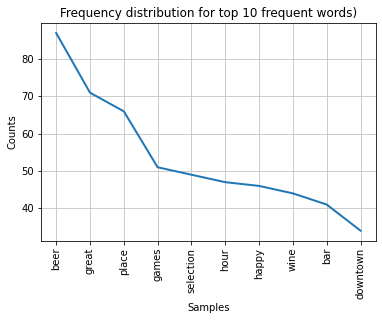

Most 10 frequent words after stemming:
('beer', 113)
('place', 71)
('great', 71)
('game', 65)
('select', 51)
('wine', 51)
('hour', 50)
('happi', 46)
('bar', 46)
('downtown', 34)


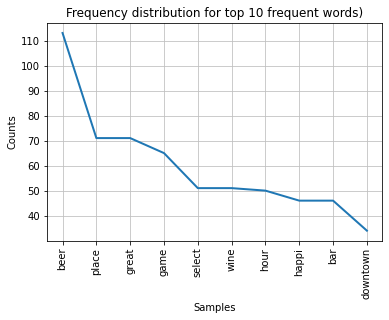

In [71]:
before_stem = count_frequency(business2,stop_list=stopwords)
after_stem = count_frequency(business2,stop_list=stopwords,stemmer = ps)

print("Most 10 frequent words before stemming:")
for x in before_stem.most_common(10):
    print(x)
plot_word_freq_dist(before_stem)

print("Most 10 frequent words after stemming:")
for x in after_stem.most_common(10):
    print(x)
plot_word_freq_dist(after_stem)